# Classification of MNIST digits with dense layers

## Loading the image data

In [0]:
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

## Preparing the image data

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train_images = train_images_original.reshape((60000, 28 , 28))
train_images = train_images.astype('float64') / 255

test_images = test_images_original.reshape((10000, 28 , 28))
test_images = test_images.astype('float64') / 255

avg_features = np.zeros((1, 28), dtype='float64')
train_features = np.zeros((60000, 29), dtype='float64')
test_features = np.zeros((10000, 29), dtype='float64')
heights = np.zeros((1, 2), dtype='float64')
height = np.zeros((1, 1), dtype='float64')

###Train

In [0]:
index = 0

found = False
for image in train_images:
  avg_features = np.mean(image, axis = 0) + np.mean(image, axis = 1)
  
  #top left
  for i in range(28):
    for j in range(28):
      if(image[i][j] == 0):
        continue
      else:
        heights[0][0] = i
        found = True
        break
    if(found):
      found = False
      break
  
  #bottom right
  for i in reversed(range(28)):
    for j in reversed(range(28)):
      if(image[i][j] == 0):
        continue
      else:
        heights[0][1] = i
        found = True
        break
    if(found):
      found = False
      break

  height[0][0] = heights[0][1] - heights[0][0] + 1.0000
  temp_array = np.concatenate((avg_features, height), axis = None)
  train_features[index] = temp_array
  heights[0][0] = 0
  heights[0][1] = 0

  index += 1

###Test

In [0]:
index = 0

found = False
for image in test_images:
  avg_features = np.mean(image, axis = 0) + np.mean(image, axis = 1)
  
  #top left
  for i in range(28):
    for j in range(28):
      if(image[i][j] == 0):
        continue
      else:
        heights[0][0] = i
        found = True
        break
    if(found):
      found = False
      break
  
  #bottom right
  for i in reversed(range(28)):
    for j in reversed(range(28)):
      if(image[i][j] == 0):
        continue
      else:
        heights[0][1] = i
        found = True
        break
    if(found):
      found = False
      break

  height[0][0] = heights[0][1] - heights[0][0] + 1.0000
  temp_array = np.concatenate((avg_features, height), axis = None)
  test_features[index] = temp_array
  heights[0][0] = 0
  heights[0][1] = 0

  index += 1

In [20]:
test_features[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.0522409 ,  0.1719888 ,  0.5280112 ,  0.51036415,
        0.24565826,  0.27983193,  0.32843137,  0.36092437,  0.30896359,
        0.28501401,  0.29845938,  0.30952381,  0.29971989,  0.30266106,
        0.24201681,  0.13151261,  0.08753501,  0.09705882,  0.12086835,
        0.12436975,  0.08403361,  0.        , 20.        ])

## Preparing the labels

We need to categorically encode the labels.

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

## The network architecture

In [22]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(29,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               15360     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________


## The compilation step

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## The training step

In [24]:
epochs = 20
history = network.fit(train_features, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_features, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 27us/step - loss: 1.5748 - acc: 0.4861 - val_loss: 1.2225 - val_acc: 0.6073
Epoch 2/20
60000/60000 [==============================] - 1s 23us/step - loss: 1.1700 - acc: 0.6181 - val_loss: 1.1310 - val_acc: 0.6313
Epoch 3/20
60000/60000 [==============================] - 1s 24us/step - loss: 1.0879 - acc: 0.6435 - val_loss: 1.0328 - val_acc: 0.6580
Epoch 4/20
60000/60000 [==============================] - 1s 23us/step - loss: 1.0250 - acc: 0.6630 - val_loss: 0.9823 - val_acc: 0.6732
Epoch 5/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.9729 - acc: 0.6761 - val_loss: 0.9528 - val_acc: 0.6779
Epoch 6/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.9296 - acc: 0.6914 - val_loss: 0.9003 - val_acc: 0.6930
Epoch 7/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.8960 - acc: 0.7026 - val_loss: 0.8764 - val_acc

## Display the training/test loss/accuracy

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

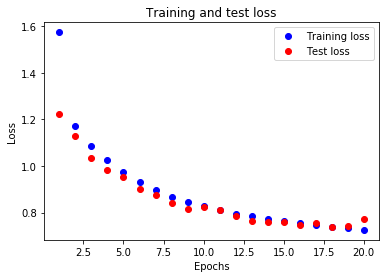

In [26]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

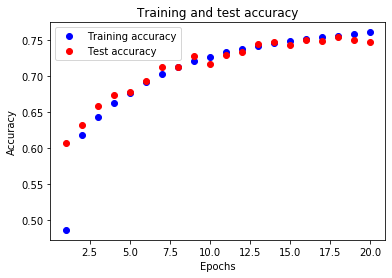

In [28]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()